In [1]:
import pandas as pd

파일경로 - data/gapminder.tsv (copy path)
##### \가 있을 경우 오류가 나는 경우가 발생 -> /로 바꾸기
##### csv = ,로 구분 tsv = tab으로 구분

In [2]:
df = pd.read_csv('data/gapminder.tsv', sep='\t')

#### 데이터 들고오면 구조부터 먼저 파악
##### head tail info type shape 등

In [3]:
df.head(2)

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030


In [4]:
df.tail(2)

,country,continent,year,lifeExp,pop,gdpPercap
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [5]:
df.sample(2)

,country,continent,year,lifeExp,pop,gdpPercap
1490,Syria,Asia,1962,50.305,4834621,2193.037133
1021,Morocco,Africa,1957,45.423,11406350,1642.002314


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB


In [7]:
df.shape

(1704, 6)

In [8]:
df.dtypes

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object

In [9]:
df.describe()

,year,lifeExp,pop,gdpPercap
count,1704.00000,1704.000000,1.704000e+03,1704.000000
mean,1979.50000,59.474439,2.960121e+07,7215.327081
std,17.26533,12.917107,1.061579e+08,9857.454543
min,1952.00000,23.599000,6.001100e+04,241.165876
25%,1965.75000,48.198000,2.793664e+06,1202.060309
50%,1979.50000,60.712500,7.023596e+06,3531.846988
75%,1993.25000,70.845500,1.958522e+07,9325.462346
max,2007.00000,82.603000,1.318683e+09,113523.132900


In [10]:
df.index

RangeIndex(start=0, stop=1704, step=1)

In [11]:
df.columns

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')

In [12]:
df.values

array([['Afghanistan', 'Asia', 1952, 28.801, 8425333, 779.4453145],
       ['Afghanistan', 'Asia', 1957, 30.332, 9240934, 820.8530296],
       ['Afghanistan', 'Asia', 1962, 31.997, 10267083, 853.10071],
       ...,
       ['Zimbabwe', 'Africa', 1997, 46.809, 11404948, 792.4499603],
       ['Zimbabwe', 'Africa', 2002, 39.989, 11926563, 672.0386227],
       ['Zimbabwe', 'Africa', 2007, 43.487, 12311143, 469.7092981]],
      dtype=object)

## 2-2

In [13]:
df['country']

0       Afghanistan
1       Afghanistan
2       Afghanistan
3       Afghanistan
4       Afghanistan
           ...     
1699       Zimbabwe
1700       Zimbabwe
1701       Zimbabwe
1702       Zimbabwe
1703       Zimbabwe
Name: country, Length: 1704, dtype: object

In [14]:
type(df['country'])

pandas.core.series.Series

In [15]:
df['country'].head(2)

0    Afghanistan
1    Afghanistan
Name: country, dtype: object

In [16]:
df['country'].tail(2)

1702    Zimbabwe
1703    Zimbabwe
Name: country, dtype: object

In [17]:
df['country'].sample(2)

1344    Sierra Leone
1449           Sudan
Name: country, dtype: object

In [18]:
df[['country','continent']]

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


In [19]:
df[['country']].sample()

,country
1307,Sao Tome and Principe


#### df.loc[행,열]

In [20]:
df.loc[:,['country','continent']]

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


In [21]:
df.loc[:,'country':'continent']

,country,continent
0,Afghanistan,Asia
1,Afghanistan,Asia
2,Afghanistan,Asia
3,Afghanistan,Asia
4,Afghanistan,Asia
...,...,...
1699,Zimbabwe,Africa
1700,Zimbabwe,Africa
1701,Zimbabwe,Africa
1702,Zimbabwe,Africa


In [22]:
df.loc[[1,5,9],'country':'continent']

,country,continent
1,Afghanistan,Asia
5,Afghanistan,Asia
9,Afghanistan,Asia


In [23]:
df.loc[1]  #두번째에 있는 행의 값

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap      820.85303
Name: 1, dtype: object

In [24]:
df.loc[0] #첫번째에 있는 행의 값

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap     779.445314
Name: 0, dtype: object

In [25]:
df.iloc[-1] #인덱스로 접근하면 -1가능 loc는 이름으로 접근하기 때문에 불가능

country        Zimbabwe
continent        Africa
year               2007
lifeExp          43.487
pop            12311143
gdpPercap    469.709298
Name: 1703, dtype: object

## 2-3
#### groupby

In [26]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [27]:
df.groupby(['year']).mean() # 두개부터는 꼭! 대괄호로 묶기

,lifeExp,pop,gdpPercap
year,,,
1952,49.057620,1.695040e+07,3725.276046
1957,51.507401,1.876341e+07,4299.408345
1962,53.609249,2.042101e+07,4725.812342
1967,55.678290,2.265830e+07,5483.653047
1972,57.647386,2.518998e+07,6770.082815
1977,59.570157,2.767638e+07,7313.166421
1982,61.533197,3.020730e+07,7518.901673
1987,63.212613,3.303857e+07,7900.920218
1992,64.160338,3.599092e+07,8158.608521


In [28]:
df.groupby(['year'])[['lifeExp']].mean()

,lifeExp
year,
1952,49.057620
1957,51.507401
1962,53.609249
1967,55.678290
1972,57.647386
1977,59.570157
1982,61.533197
1987,63.212613
1992,64.160338


In [29]:
#대륙별 기대수명
df.groupby(['continent'])[['lifeExp']].mean()

,lifeExp
continent,
Africa,48.865330
Americas,64.658737
Asia,60.064903
Europe,71.903686
Oceania,74.326208


In [30]:
#연도별, 대륙별 기대수명
df.groupby(['year','continent'])[['lifeExp']].mean()

lifeExp
year continent           
1952 Africa     39.135500
     Americas   53.279840
     Asia       46.314394
     Europe     64.408500
     Oceania    69.255000
1957 Africa     41.266346
     Americas   55.960280
     Asia       49.318544
     Europe     66.703067
     Oceania    70.295000
1962 Africa     43.319442
     Americas   58.398760
     Asia       51.563223
     Europe     68.539233
     Oceania    71.085000
1967 Africa     45.334538
     Americas   60.410920
     Asia       54.663640
     Europe     69.737600
     Oceania    71.310000
1972 Africa     47.450942
     Americas   62.394920
     Asia       57.319269
     Europe     70.775033
     Oceania    71.910000
1977 Africa     49.580423
     Americas   64.391560
     Asia       59.610556
     Europe     71.937767
     Oceania    72.855000
1982 Africa     51.592865
     Americas   66.228840
     Asia       62.617939
     Europe     72.806400
     Oceania    74.290000
1987 Africa     53.344788
     Americas   68.090720
     Asia       64.851182
     Europe     73.642167
     Oceania    75.320000
1992 Africa     53.629577
     Americas   69.568360
     Asia       66.537212
     Europe     74.440100
     Oceania    76.945000
1997 Africa     53.598269
     Americas   71.150480
     Asia       68.020515
     Europe     75.505167
     Oceania    78.190000
2002 Africa     53.325231
     Americas   72.422040
     Asia       69.233879
     Europe     76.700600
     Oceania    79.740000
2007 Africa     54.806038
     Americas   73.608120
     Asia       70.728485
     Europe     77.648600
     Oceania    80.719500

In [31]:
df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

In [32]:
#대륙안에 나라의 개수
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

## 2-4

In [33]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='year'>

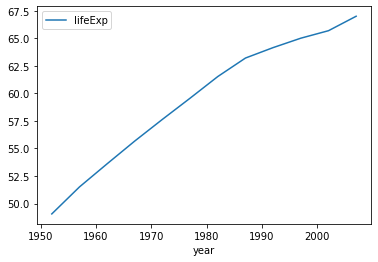

In [34]:
df.groupby(['year'])[['lifeExp']].mean().plot()

<AxesSubplot:xlabel='year'>

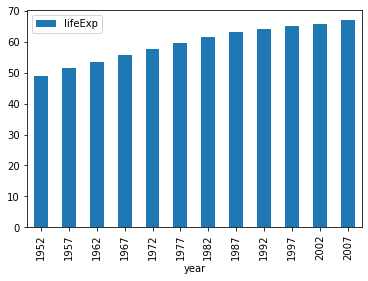

In [35]:
data = df.groupby(['year'])[['lifeExp']].mean()
data.plot(kind='bar')

<AxesSubplot:ylabel='year'>

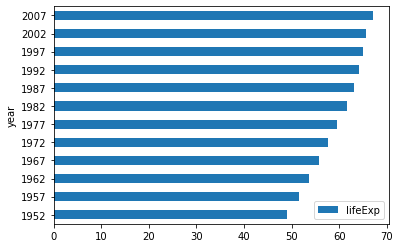

In [36]:
data = df.groupby(['year'])[['lifeExp']].mean()
data.plot(kind='barh')

<AxesSubplot:xlabel='continent'>

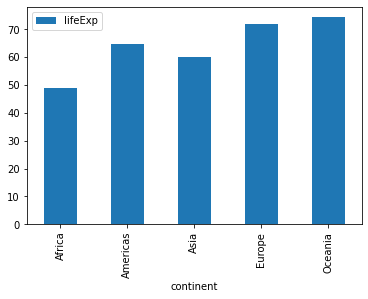

In [37]:
df.groupby(['continent'])[['lifeExp']].mean().plot(kind='bar')

<AxesSubplot:ylabel='Frequency'>

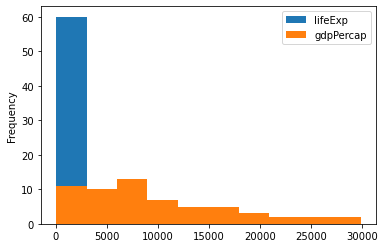

In [38]:
df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean().plot(kind='hist')

<AxesSubplot:xlabel='continent'>

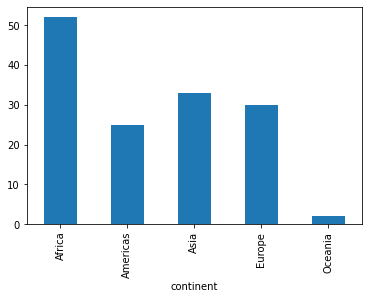

In [39]:
df.groupby('continent')['country'].nunique().plot(kind='bar')

In [40]:
type(df['country'])

pandas.core.series.Series

In [41]:
df['country'].drop_duplicates()

0              Afghanistan
12                 Albania
24                 Algeria
36                  Angola
48               Argentina
               ...        
1644               Vietnam
1656    West Bank and Gaza
1668           Yemen, Rep.
1680                Zambia
1692              Zimbabwe
Name: country, Length: 142, dtype: object